# Numerical solution of ODEs - IVP

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Numerical solution of ODEs

This Jupyter Notebook implements and demonstrates numerical solution of ODEs. 



### Euler's method, Heun's method, and Midpoint method

The following is an example implementation of the Euler method, Heun's method, and midpoint method. These methods are used to solve a simple ODE in the form of 
\begin{equation}
\frac{dy}{dx} = 2xy + x
\end{equation}
with the IC:
\begin{equation}
  y(x=0) = 1
\end{equation}
The analytical solution is
\begin{equation}
  y(x) = \frac{3}{2}e^{2x}-\frac{1}{2}
\end{equation}

Solving the ODE from x_0 = 0 to x_n = 2.0 with n = 20 steps.


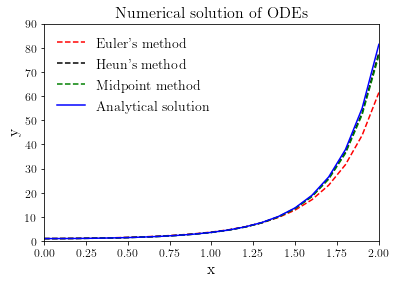

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#the Euler's method
#f is the dydx slope function
#x_0 and y_0 are IC
#h is step size and n is the number of steps
def Euler(f,x_0,y_0,h,n):
    x_res = np.zeros(n+1)
    y_res = np.zeros(n+1)
    x,y = x_0,y_0
    x_res[0] = x_0
    y_res[0] = y_0
    i = 0
    while i < n:
        x += h
        y += h * f(x,y)
        i = i + 1
        x_res[i] = x
        y_res[i] = y
     
    return x_res, y_res

#the Heun's method
#f is the dydx slope function
#x_0 and y_0 are IC
#h is step size and n is the number of steps
def Heun(f,x_0,y_0,h,n):
    x_res = np.zeros(n+1)
    y_res = np.zeros(n+1)
    x,y = x_0,y_0
    x_res[0] = x_0
    y_res[0] = y_0
    i = 0
    while i < n:
        y_pred = y + f(x,y)*h
        y += h * (f(x,y)+f(x+h,y_pred))/2.0
        x += h
        i = i + 1
        x_res[i] = x
        y_res[i] = y
     
    return x_res, y_res

#the midpoint method
#f is the dydx slope function
#x_0 and y_0 are IC
#h is step size and n is the number of steps
def Midpoint(f,x_0,y_0,h,n):
    x_res = np.zeros(n+1)
    y_res = np.zeros(n+1)
    x,y = x_0,y_0
    x_res[0] = x_0
    y_res[0] = y_0
    i = 0
    while i < n:
        y_mid = y + f(x,y)*h/2.0
        x_mid = x + h/2.0
        y += h * f(x_mid,y_mid)
        x += h
        i = i + 1
        x_res[i] = x
        y_res[i] = y
     
    return x_res, y_res

#define the dydx function
def dydx(x, y):
    return 2.0*x*y + x
 
#IC
x_0 = 0
y_0 = 1

#step size
h = 0.1

#end of x
x_n = 2.0

#how many steps
n = int((x_n-x_0)/h)

print("Solving the ODE from x_0 =", x_0, "to x_n =", x_n, "with n =", n, "steps.")

#call the ODE solvers
x_res_Euler, y_res_Euler = Euler(dydx,x_0,y_0,h,n)
x_res_Heun, y_res_Heun = Heun(dydx,x_0,y_0,h,n)
x_res_Midpoint, y_res_Midpoint = Midpoint(dydx,x_0,y_0,h,n)

#analytical solution
x_ana = np.linspace(x_0,x_n,n+1)
y_ana = 1.5*np.exp(x_ana**2)-0.5

#plot and compare the result
plt.plot(x_res_Euler, y_res_Euler, 'r--', label='Euler\'s method')
plt.plot(x_res_Heun, y_res_Heun, 'k--', label='Heun\'s method')
plt.plot(x_res_Midpoint, y_res_Midpoint, 'g--', label='Midpoint method')
plt.plot(x_ana, y_ana, color='blue', label='Analytical solution')

#set the limit for the x and y axes
plt.xlim([0,2])
plt.ylim([0,90])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Numerical solution of ODEs',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper left',fontsize=14,frameon=False)
#plt.savefig("ODE_solution.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### RK4 method

The following implements the RK4 method and demonstrates its use with the same ODE system as above. 

Solving the ODE from x_0 = 0 to x_n = 2.0 with n = 20 steps.


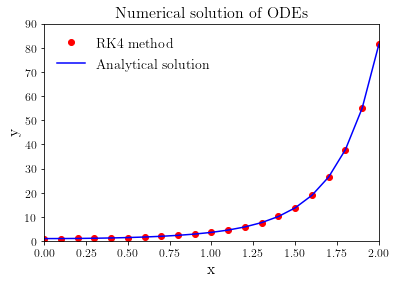

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#the RK4 method
#f is the dydx slope function
#x_0 and y_0 are IC
#h is step size and n is the number of steps
def RK4(f,x_0,y_0,h,n):
    x_res = np.zeros(n+1)
    y_res = np.zeros(n+1)
    x,y = x_0,y_0
    x_res[0] = x_0
    y_res[0] = y_0
    i = 0
    while i < n:
        k1 = f(x,y)
        k2 = f(x+0.5*h,y+0.5*k1*h)
        k3 = f(x+0.5*h,y+0.5*k2*h)
        k4 = f(x+h,y+k3*h)
        x += h
        y += h * (k1+2*k2+2*k3+k4)/6.0
        i = i + 1
        x_res[i] = x
        y_res[i] = y
     
    return x_res, y_res


#define the dydx function
def dydx(x, y):
    return 2.0*x*y + x
 
#IC
x_0 = 0
y_0 = 1

#step size
h = 0.1

#end of x
x_n = 2.0

#how many steps
n = int((x_n-x_0)/h)

print("Solving the ODE from x_0 =", x_0, "to x_n =", x_n, "with n =", n, "steps.")

#call the ODE solvers
x_res_Euler, y_res_Euler = RK4(dydx,x_0,y_0,h,n)

#analytical solution
x_ana = np.linspace(x_0,x_n,n+1)
y_ana = 1.5*np.exp(x_ana**2)-0.5

#plot and compare the result
plt.plot(x_res_Euler, y_res_Euler, 'ro', label='RK4 method')
plt.plot(x_ana, y_ana, color='blue', label='Analytical solution')

#set the limit for the x and y axes
plt.xlim([0,2])
plt.ylim([0,90])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Numerical solution of ODEs',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper left',fontsize=14,frameon=False)
#plt.savefig("ODE_solution.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### Solve an ODE system with RK4

In this example, a simple ODE system is solved with RK4. The ODE system describes the trajectory of an object only under the influence of gravity. Let $x(t)$ and $y(t)$ be the position of the object at time $t$, and $u(t)$ and $v(t)$ be the corresponding velocity. Then, the ODE system can be written as

\begin{eqnarray}
   \frac{dx}{dt}&=&u \\
   \frac{dy}{dt} &=& v \\
   \frac{du}{dt} &=& 0 \\
   \frac{dv}{dt} &=& -g 
\end{eqnarray}

The initial position and velocity of the object need to be specified so the system can march forward:
\begin{equation}
x(t=0)=x0, y(t=0), u(t=0)=u0, v(t=0)=v0
\end{equation}

The analytical solution for the trajectory of the object is simply
\begin{eqnarray}
   x(t) &=& x0+u0*t \\
   y(t) &=& y0+v0*t - 0.5gt^2 
\end{eqnarray}

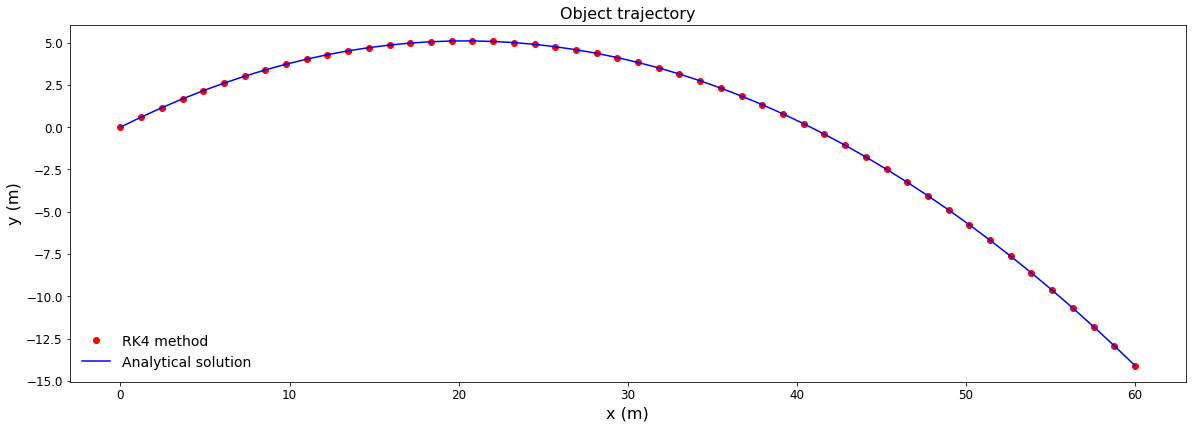

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

def RK4_ODE_system(f, IC, t):
    n = len(t)
    Y = np.zeros((n, len(IC)))
    Y[0] = IC
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(Y[i], t[i])
        k2 = f(Y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(Y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(Y[i] + k3 * h, t[i] + h)
        Y[i+1] = Y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return Y

def f(y, t):
    return np.array([y[2], y[3], 0, -9.8])

n = 50
t = np.linspace(0, 3, n)

#ICs:
x0 = 0
y0 = 0
u0 = 20
v0 = 10
IC = np.array([x0, y0, u0, v0])

sol = RK4_ODE_system(f, IC, t)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

#plot and compare the result
plt.plot(sol[:,0], sol[:,1], 'ro', label='RK4 method')

x_ana = x0+u0*t
y_ana = y0 + v0*t - 0.5*9.8*t**2
plt.plot(x_ana, y_ana, color='blue', label='Analytical solution')

#set the limit for the x and y axes
#plt.xlim([0,2])
#plt.ylim([0,90])

ax.axes.set_aspect('equal')

#set x and y axes label and font size
plt.xlabel('x (m)',fontsize=16)
plt.ylabel('y (m)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Object trajectory',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='lower left',fontsize=14,frameon=False)
#plt.savefig("ODE_solution.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()